In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/data_science_job_dataset.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

## as we can apply Complete Case Analysis (CCA) only on columns having missing val %age < 5%

In [5]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [6]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
12976,0.743,no_enrollment,Masters,18.0,17.0
9862,0.920,no_enrollment,Phd,20.0,214.0
8427,0.920,no_enrollment,Graduate,5.0,15.0
13403,0.923,no_enrollment,Masters,12.0,81.0
13898,0.843,Full time course,High School,4.0,144.0


In [7]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

In [8]:
new_df

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


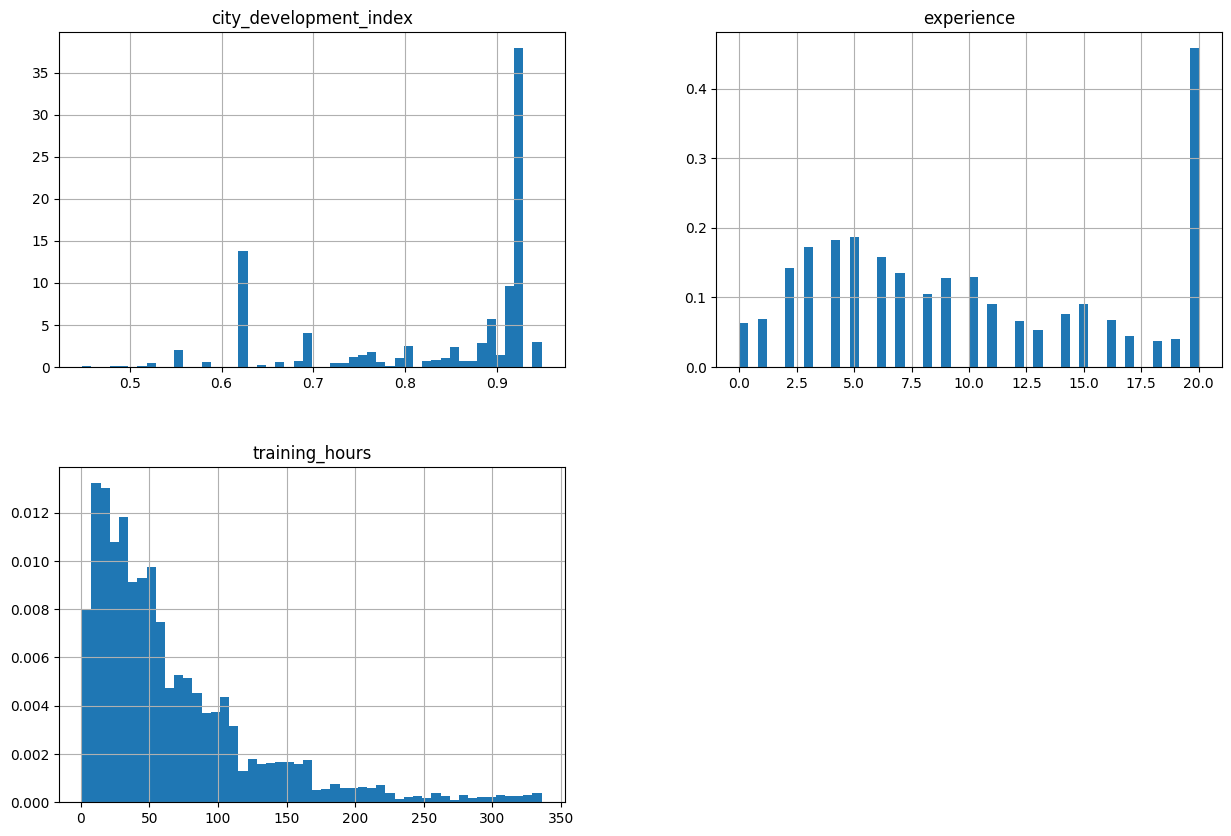

In [11]:
new_df.hist(bins = 50, density=True, figsize=(15,10))
plt.show()

<Axes: ylabel='Density'>

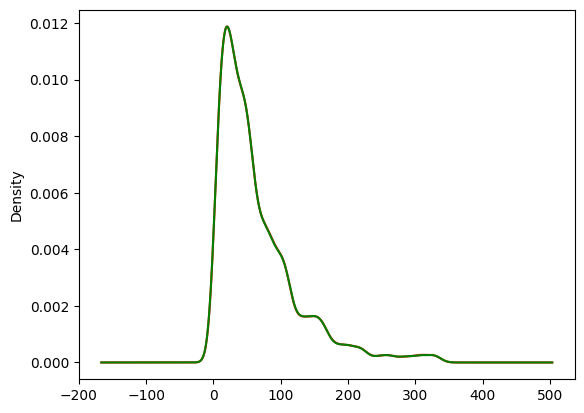

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['training_hours'].plot.density(color='red')
new_df['training_hours'].plot.density(color='green')

## these overlapping graphs shows that the difference between non-missing data values are nearly zero depicting the missing values as MVAR missing values at random

<Axes: ylabel='Density'>

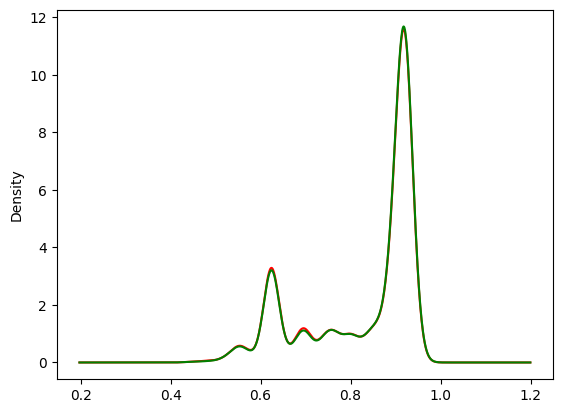

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['city_development_index'].plot.density(color='red')
new_df['city_development_index'].plot.density(color='green')

## comparing data values berfore and after removal of missing values

In [14]:
temp = pd.concat([
    df['enrolled_university'].value_counts()/len (df),
    new_df['enrolled_university'].value_counts()/len(new_df)
], axis=1)

temp.columns = ['original', 'cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [15]:
temp = pd.concat([
    df['education_level'].value_counts()/len (df),
    new_df['education_level'].value_counts()/len(new_df)
], axis=1)

temp.columns = ['original', 'cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
